통계적 사고 (2판) 연습문제 ([thinkstats2.com](thinkstats2.com), [think-stat.xwmooc.org](http://think-stat.xwmooc.org))<br>
Allen Downey / 이광춘(xwMOOC)

In [14]:
%matplotlib inline
from __future__ import print_function
import hinc
import density
import chap06soln
import thinkstats2
import thinkplot
import numpy as np

## 연습문제 6.1

소득 분포는 유명하게도 우측으로 기울어져 있다. 이번 연습문제에서, 이 치우침이 얼마나 강한지 측정할 것이다.
인구동향조사(Current Population Survey, CPS)는 노동통계국(Bureau of Labor Statistics)과 인구조사국(Census Bureau)의 공동작업으로 소득과 관련된 변수를 연구한다. 2013년에 수집된 데이터는 http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm에서 다운로드 받을 수 있다. 저자는 가구소득 정보를 갖는 엑셀 파일 hinc06.xls 을 다운로드 받아서, 이책의 저장소에서 찾을 수 있는 CSV 파일 hinc06.csv로 변환했다. 이 CSV 파일을 불러읽는 hinc.py 파일도 함께 있다.

데이터셋은 소득구간과 해당 구간에 속하는 응답자수의 형태로 되어있다. 
가장 낮은 구간은 "$5000 이하" 이하 연간소득을 신고한 응답자가 포함된다. 가장 높은 구간은 "$250,000 이상" 벌어들인 응답자가 포함된다.

이 데이터에서 평균과 다른 통계량을 추정하는데, 하한과 상한에 대해서, 그리고 각 구간에 값들이 어떻게 분포되었는지에 관해 가정을 해야한다. hinc2.py 파일에 InterpolateSample이 제공되는데, 데이터를 모형화하는 한 방법을 보여주고 있다. 각 구간에 대한 상한을 담고 있는 income 칼럼과 각 구간에 응답자수를 담고 있는 freq 칼럼을 갖는 데이터프레임을 인수로 받는다.

log_upper도 인수로 받는데, log10 달러로 표현되는 가장 소득이 높은 구간의 상한이다. 기본설정값 log_upper=6.0 인데 응답자 가운데에 가장 높은 소득이 106, 즉 백만불이라는 가정을 나타낸다.

InterpolateSample는 유사표본을 생성한다; 즉, 각 구간에서 실제 데이터와 같은 응답자수를 산출해내는 가구소득 표본이다. 각 구간 소득이 log10 척도로 균등분할됨을 가정한다.

결과로 나온 표본에 대해 중위수, 평균, 기울어짐, 피어슨 기울어짐을 계산하시오. 평균이하 세금을 매길 수 있는 소득이 있는 가구 비율은 얼마인가? 결과가 가정한 상한에 얼마나 의존하는가?

소득에 대한 왜도, 중위수, 평균, 표준편차와 피어슨 왜도를 계산하시오.

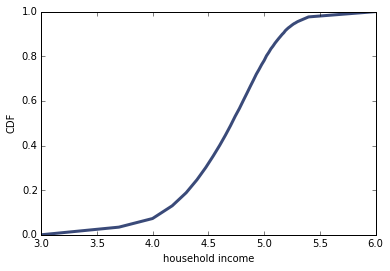

mean 74278.7075312
std 93946.9299635
median 51226.4544789
skewness 4.94992024443
pearson skewness 0.736125801914


(74278.707531187203, 51226.454478940461)

In [16]:
df = hinc.ReadData()
log_sample = chap06soln.InterpolateSample(df, log_upper=6.0)

log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Show(xlabel='household income',
                         ylabel='CDF')

sample = np.power(10, log_sample)
density.Summarize(sample)

`log_upper=7.0`으로 조정한 분석결과.

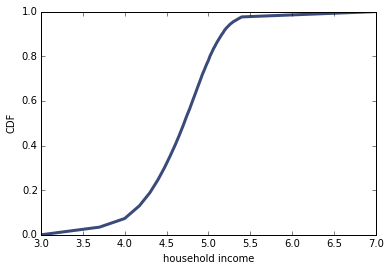

mean 124267.397222
std 559608.501374
median 51226.4544789
skewness 11.6036902675
pearson skewness 0.391564509277


(124267.39722164697, 51226.454478940461)

In [17]:
df = hinc.ReadData()
log_sample = chap06soln.InterpolateSample(df, log_upper=7.0)

log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Show(xlabel='household income',
                         ylabel='CDF')

sample = np.power(10, log_sample)
density.Summarize(sample)

더 높은 상한으로, 예상한 듯이 적률기반 왜도는 증가한다. 놀랍게도, 피어슨 왜도는 낮아진다! 이유는 아마도 상한을 높이는 것이 평균에 영향을 어느정도 미치고, 표준편차에 좀더 강한 효과를 미치는 것으로 보인다. 표준편차가 분모에 3승한 것이라, 결과에 더 강한 영향을 준다.

그래서, 이것이 피어슨 왜도가 요약통계량으로 잘 동작하지 않는 예제다. 더 나은 선택지는 문맥적으로 의미를 갖는 예를 들어 평균이하 소득을 갖는 비율같은 통계량이 된다. 혹은, (두 확률 집단에서 예상되는 상대적 차이같은) 분포의 특성을 계량화하려고 설계된 지니 계수같은 것이 된다. 

cdf[mean]:  66.0005879567  %


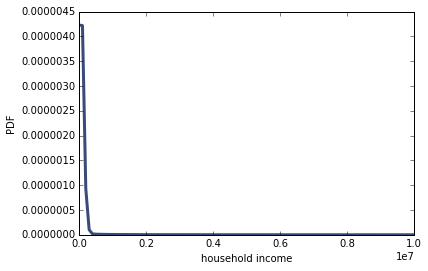

In [20]:
cdf = thinkstats2.Cdf(sample)
print('cdf[mean]: ', cdf[mean]*100, ' %')

pdf = thinkstats2.EstimatedPdf(sample)
thinkplot.Pdf(pdf)
thinkplot.Show(xlabel='household income',
                        ylabel='PDF')